<a href="https://colab.research.google.com/github/jeanferuzi-oss/portafolio/blob/etapa-3/Etapa3_Sin_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Etapa Final: Implementación y Comparación de Modelos de Clasificación

En esta etapa final del proyecto se procede a la implementación de modelos de clasificación, con el propósito de evaluar el efecto de la reducción de dimensionalidad sobre el desempeño predictivo y la estructura del problema. Las fases de proyecto son las siguientes:

En primer lugar, se construyen dos modelos de clasificación utilizando el conjunto de datos original, es decir, considerando la totalidad de las variables explicativas sin aplicar técnicas de reducción de dimensionalidad. Esta aproximación permite establecer una línea base (baseline) para el análisis comparativo posterior. Posteriormente, se desarrollan los mismos modelos de clasificación empleando como variables de entrada las componentes principales obtenidas en la etapa de reducción de dimensionalidad mediante PCA. De esta forma, se evalúa si la representación reducida de los datos logra preservar información relevante para la tarea de clasificación. Ambos enfoques se implementan bajo condiciones metodológicas comparables, manteniendo criterios consistentes de partición de datos y métricas de evaluación. El desempeño de los modelos se analiza mediante indicadores adecuados al problema de clasificación, permitiendo contrastar los resultados obtenidos con datos originales y con datos reducidos.

Finalmente, se realiza un análisis comparativo de los resultados, discutiendo las ventajas y limitaciones de cada enfoque, así como el impacto del uso de PCA en términos de desempeño, interpretabilidad y complejidad del modelo. Esta etapa cierra el proyecto integrando los aprendizajes obtenidos a lo largo de las fases previas y fundamentando las decisiones analíticas adoptadas.

##Vinculación de Almacenamiento Cloud
Establece una conexión directa entre el entorno de ejecución de Google Colab y el sistema de archivos de Google Drive. Esto permite la lectura y persistencia de datos de forma permanente en la nube, facilitando el acceso a archivos CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Recuperación de Datos: Conexión entre Etapa 1 y Etapa 2
La carga del archivo CSV desde Google Drive permite recuperar todo el trabajo de limpieza y ordenamiento realizado anteriormente. Este paso es el punto de partida para el análisis de la Etapa 2, asegurando que los nombres de columnas y la estructura de los datos sean los correctos. La visualización de las primeras filas confirma que la base de datos está lista para aplicar la estandarización y el modelo de Componentes Principales (PCA).

In [ ]:
import pandas as pd

ruta = '/content/drive/MyDrive/proyecto_wb/df_etapa2_sinpsa.csv'
df_wb = pd.read_csv(ruta)

df_wb.head()

df_wb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Crecimiento_Poblacional             198 non-null    float64
 1   Poblacion_Mujeres_Pct               198 non-null    float64
 2   Poblacion_Hombres_Pct               198 non-null    float64
 3   Crecimiento_Pob_Urbana              198 non-null    float64
 4   Poblacion_Urbana_Pct                198 non-null    float64
 5   Fuerza_Laboral_Mujeres_Pct          198 non-null    float64
 6   Desempleo_Mujeres_Pct               198 non-null    float64
 7   Desempleo_Hombres_Pct               198 non-null    float64
 8   Crecimiento_Pob_Rural               198 non-null    float64
 9   Poblacion_Rural_Pct                 198 non-null    float64
 10  Inflacion_Anual                     198 non-null    float64
 11  Exportaciones_Pct_PIB               198 non-n

## Modelamiento de datos

In [ ]:
df_wb['disc_PPP'].value_counts()

,count
disc_PPP,
Low,40
Medium,40
High,40
Medium-High,39
Medium-Low,39


Al estar la muestra balanceada, se puede priorizar la Exactitud para predecir la mayor cantidad de forma correcta. Considerando que los costos de error son similares y bajos.

## Preparación de Datos

Dividir el DataFrame en características (X) y la variable objetivo (y). Excluir las columnas 'Iso', 'Country' y 'disc_PPP' de las características.


In [ ]:
y = df_wb['disc_PPP']
X = df_wb.drop(columns=['Iso', 'Country', 'disc_PPP'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 values of y:")
print(y.head())

Shape of X: (198, 38)
Shape of y: (198,)
First 5 rows of X:
   Crecimiento_Poblacional  Poblacion_Mujeres_Pct  Poblacion_Hombres_Pct  \
0                -0.704162               0.936469              -0.936469   
1                 0.625129              -0.150035               0.150035   
2                 1.226227               0.185007              -0.185007   
3                -1.714679               0.196172              -0.196172   
4                 0.178725              -0.374683               0.374683   

   Crecimiento_Pob_Urbana  Poblacion_Urbana_Pct  Fuerza_Laboral_Mujeres_Pct  \
0               -0.965277             -0.016335                    0.265240   
1                0.393740             -1.620658                   -4.090734   
2                1.374919              0.337352                    0.874677   
3               -1.469222             -0.176253                    0.355321   
4               -0.122302              1.174264                    0.014369   

   Desem

# Modelo 1 Support Vector Clasificator

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

results = []

test_sizes = np.arange(0.1, 0.51, 0.05)

for test_size in test_sizes:
    print(f"\nEvaluating with test_size = {test_size:.2f}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    model = SVC(random_state=42, probability=True)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

print("\nResults for different test_sizes:")
for res in results:
    print(f"  Test Size: {res['test_size']:.2f}, Accuracy: {res['accuracy']:.4f}, Precision: {res['precision']:.4f}, Recall: {res['recall']:.4f}, F1-Score: {res['f1_score']:.4f}")


Evaluating with test_size = 0.10

Evaluating with test_size = 0.15

Evaluating with test_size = 0.20

Evaluating with test_size = 0.25

Evaluating with test_size = 0.30

Evaluating with test_size = 0.35

Evaluating with test_size = 0.40

Evaluating with test_size = 0.45

Evaluating with test_size = 0.50

Results for different test_sizes:
  Test Size: 0.10, Accuracy: 0.7000, Precision: 0.7267, Recall: 0.7000, F1-Score: 0.6978
  Test Size: 0.15, Accuracy: 0.7667, Precision: 0.7629, Recall: 0.7667, F1-Score: 0.7629
  Test Size: 0.20, Accuracy: 0.7000, Precision: 0.7075, Recall: 0.7000, F1-Score: 0.7026
  Test Size: 0.25, Accuracy: 0.6600, Precision: 0.6740, Recall: 0.6600, F1-Score: 0.6625
  Test Size: 0.30, Accuracy: 0.6667, Precision: 0.6811, Recall: 0.6667, F1-Score: 0.6684
  Test Size: 0.35, Accuracy: 0.6571, Precision: 0.6920, Recall: 0.6571, F1-Score: 0.6583
  Test Size: 0.40, Accuracy: 0.5875, Precision: 0.6303, Recall: 0.5875, F1-Score: 0.5871
  Test Size: 0.45, Accuracy: 0.6444,

In [ ]:
import pandas as pd

df_results = pd.DataFrame(results)

print("DataFrame created from results:")
print(df_results.head())

DataFrame created from results:
   test_size  accuracy  precision    recall  f1_score
0       0.10  0.700000   0.726667  0.700000  0.697778
1       0.15  0.766667   0.762857  0.766667  0.762937
2       0.20  0.700000   0.707540  0.700000  0.702647
3       0.25  0.660000   0.674048  0.660000  0.662456
4       0.30  0.666667   0.681087  0.666667  0.668382


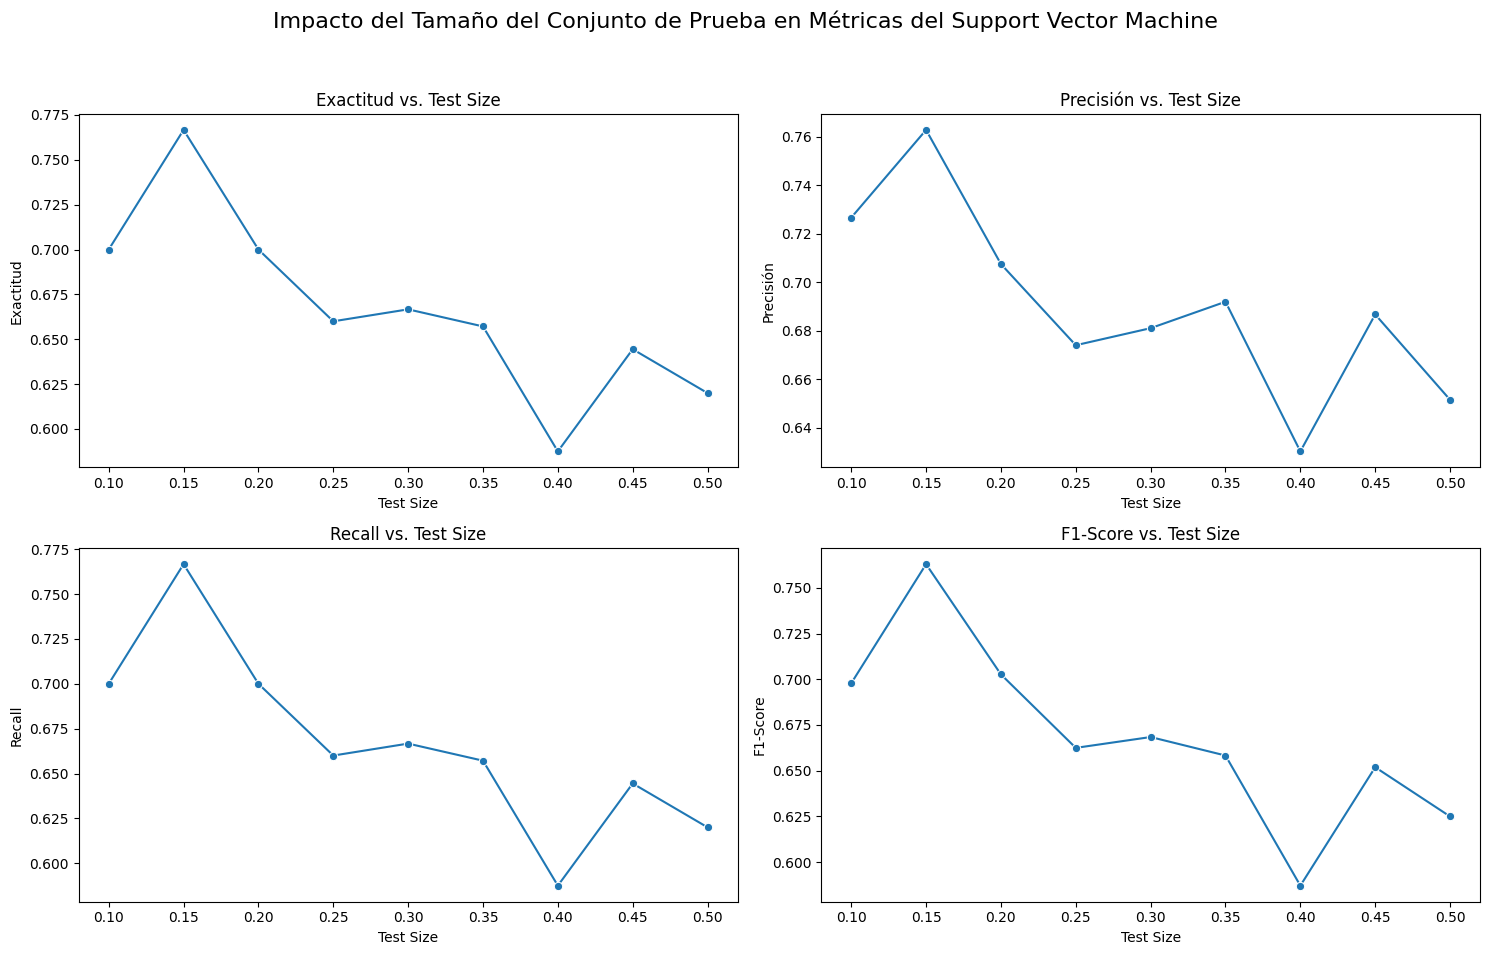

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Impacto del Tamaño del Conjunto de Prueba en Métricas del Support Vector Machine', fontsize=16)

sns.lineplot(ax=axes[0, 0], x='test_size', y='accuracy', data=df_results, marker='o')
axes[0, 0].set_title('Exactitud vs. Test Size')
axes[0, 0].set_xlabel('Test Size')
axes[0, 0].set_ylabel('Exactitud')

sns.lineplot(ax=axes[0, 1], x='test_size', y='precision', data=df_results, marker='o')
axes[0, 1].set_title('Precisión vs. Test Size')
axes[0, 1].set_xlabel('Test Size')
axes[0, 1].set_ylabel('Precisión')

sns.lineplot(ax=axes[1, 0], x='test_size', y='recall', data=df_results, marker='o')
axes[1, 0].set_title('Recall vs. Test Size')
axes[1, 0].set_xlabel('Test Size')
axes[1, 0].set_ylabel('Recall')

sns.lineplot(ax=axes[1, 1], x='test_size', y='f1_score', data=df_results, marker='o')
axes[1, 1].set_title('F1-Score vs. Test Size')
axes[1, 1].set_xlabel('Test Size')
axes[1, 1].set_ylabel('F1-Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Análisis y Recomendación del Test Size

### Objetivo:
Interpretar los gráficos para identificar tendencias y sugerir un `test_size` apropiado basado en el rendimiento del modelo.

### Resultados
Basándose en el análisis de los gráficos generados, un test_size de 0.15 parece ser el más apropiado, ya que estos valores muestran consistentemente un rendimiento más alto y más estable en las métricas de exactitud, precisión, recall y F1-score en comparación con otros valores de test_size probados.


## División de Datos

Dividir los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribution of target variable in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of target variable in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (168, 38)
Shape of X_test: (30, 38)
Shape of y_train: (168,)
Shape of y_test: (30,)

Distribution of target variable in y_train:
disc_PPP
Low            0.202381
Medium         0.202381
High           0.202381
Medium-Low     0.196429
Medium-High    0.196429
Name: proportion, dtype: float64

Distribution of target variable in y_test:
disc_PPP
Medium-High    0.2
High           0.2
Medium         0.2
Medium-Low     0.2
Low            0.2
Name: proportion, dtype: float64


In [ ]:
from sklearn.svm import SVC

model = SVC(random_state=42, probability=True)

model.fit(X_train, y_train)

print("Support Vector Classifier trained successfully.")

Support Vector Classifier trained successfully.


In [ ]:
y_pred = model.predict(X_test)

print("Predictions on the test set generated successfully.")
print("First 5 predictions:", y_pred[:5])

Predictions on the test set generated successfully.
First 5 predictions: ['Medium-High' 'High' 'High' 'Medium' 'Medium-Low']


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Accuracy: 0.7667
Precision (weighted): 0.7629
Recall (weighted): 0.7667
F1-Score (weighted): 0.7629


##ROC Multi-Clase Support Vector Classificator sin PCA

Binarizar la variable objetivo `y_test` y obtener las probabilidades de predicción del modelo para el conjunto de prueba (`X_test`).


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()

label_binarizer.fit(y)

y_test_binarized = label_binarizer.transform(y_test)

y_pred_proba = model.predict_proba(X_test)

print("Shape of binarized y_test:", y_test_binarized.shape)
print("Shape of prediction probabilities:", y_pred_proba.shape)
print("First 5 rows of binarized y_test:\n", y_test_binarized[:5])
print("First 5 rows of prediction probabilities:\n", y_pred_proba[:5])

Shape of binarized y_test: (30, 5)
Shape of prediction probabilities: (30, 5)
First 5 rows of binarized y_test:
 [[0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]
First 5 rows of prediction probabilities:
 [[2.12471132e-01 7.30786894e-03 2.15741928e-01 5.32599766e-01
  3.18793051e-02]
 [9.19186103e-01 2.62571533e-03 1.86561856e-03 7.54324697e-02
  8.90093648e-04]
 [3.28075128e-01 2.53137680e-02 2.59306306e-01 3.19775441e-01
  6.75293571e-02]
 [9.38470490e-02 2.72794959e-02 4.42576524e-01 1.89009309e-01
  2.47287622e-01]
 [1.25734397e-02 1.99309670e-02 2.52375166e-01 3.14639227e-02
  6.83656504e-01]]


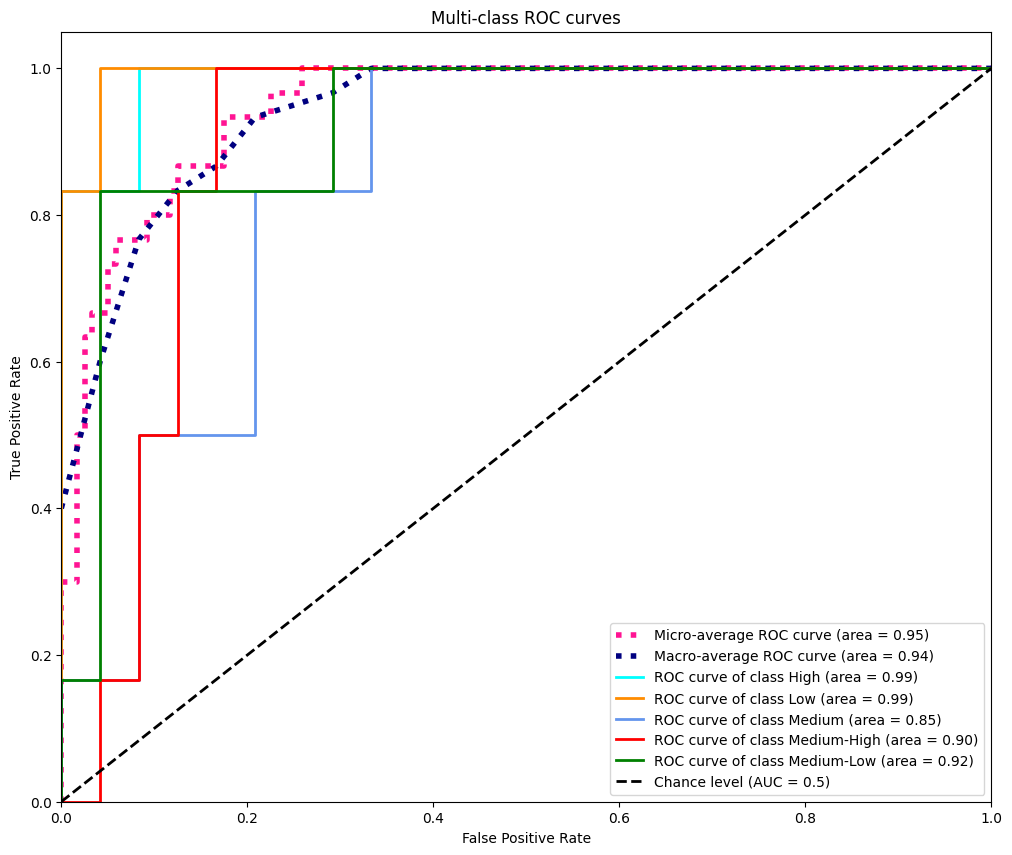

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(12, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

class_names = label_binarizer.classes_

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves')
plt.legend(loc="lower right")
plt.show()

Análisis de las Curvas ROC y AUC:

Curvas Individuales: El gráfico muestra la curva ROC para cada una de las 5 categorías de disc_PPP. La línea azul clara (aqua) representa la clase 'High' con un AUC de 0.99, y la línea naranja oscuro (darkorange) representa la clase 'Low' también con un AUC de 0.99. Esto sugiere que el modelo tiene una capacidad perfecta para distinguir estas dos clases de las demás en el conjunto de prueba. Las otras clases ('Medium', 'Medium-High', 'Medium-Low') también muestran un rendimiento muy bueno, con AUCs de 0.85, 0.90 y 0.92 respectivamente.

Micro-average ROC (rosa): Esta curva se calcula globalmente, considerando todos los pares de predicciones y etiquetas en todas las clases. El AUC micro-promedio es de 0.95, lo que indica un excelente rendimiento general del modelo en la clasificación multi-clase.

Macro-average ROC (azul oscuro): Esta curva promedia las métricas de ROC de cada clase de manera independiente. El AUC macro-promedio es de 0.94, lo que también confirma el alto rendimiento del modelo, especialmente porque toma en cuenta el rendimiento en cada clase sin importar su tamaño.

Nivel de Azar (gris discontinuo): La línea discontinua negra horizontal a AUC = 0.5 representa un clasificador que predice al azar. Todas las curvas de nuestro modelo están muy por encima de esta línea, lo que demuestra que el modelo es mucho mejor que el azar para todas las clases y en promedio.

# Modelo 2 Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

results = []

test_sizes = np.arange(0.1, 0.51, 0.05)

for test_size in test_sizes:
    print(f"\nEvaluating with test_size = {test_size:.2f}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    model = RandomForestClassifier(random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

print("\nResults for different test_sizes:")
for res in results:
    print(f"  Test Size: {res['test_size']:.2f}, Accuracy: {res['accuracy']:.4f}, Precision: {res['precision']:.4f}, Recall: {res['recall']:.4f}, F1-Score: {res['f1_score']:.4f}")


Evaluating with test_size = 0.10

Evaluating with test_size = 0.15

Evaluating with test_size = 0.20

Evaluating with test_size = 0.25

Evaluating with test_size = 0.30

Evaluating with test_size = 0.35

Evaluating with test_size = 0.40

Evaluating with test_size = 0.45

Evaluating with test_size = 0.50

Results for different test_sizes:
  Test Size: 0.10, Accuracy: 0.8000, Precision: 0.8200, Recall: 0.8000, F1-Score: 0.8048
  Test Size: 0.15, Accuracy: 0.8333, Precision: 0.8517, Recall: 0.8333, F1-Score: 0.8368
  Test Size: 0.20, Accuracy: 0.8250, Precision: 0.8389, Recall: 0.8250, F1-Score: 0.8273
  Test Size: 0.25, Accuracy: 0.8400, Precision: 0.8500, Recall: 0.8400, F1-Score: 0.8414
  Test Size: 0.30, Accuracy: 0.8167, Precision: 0.8236, Recall: 0.8167, F1-Score: 0.8183
  Test Size: 0.35, Accuracy: 0.8000, Precision: 0.8081, Recall: 0.8000, F1-Score: 0.8008
  Test Size: 0.40, Accuracy: 0.7500, Precision: 0.7875, Recall: 0.7500, F1-Score: 0.7576
  Test Size: 0.45, Accuracy: 0.7778,

In [ ]:
import pandas as pd

df_results = pd.DataFrame(results)

print("DataFrame created from results:")
print(df_results.head())

DataFrame created from results:
   test_size  accuracy  precision    recall  f1_score
0       0.10  0.800000   0.820000  0.800000  0.804762
1       0.15  0.833333   0.851667  0.833333  0.836797
2       0.20  0.825000   0.838889  0.825000  0.827311
3       0.25  0.840000   0.850000  0.840000  0.841414
4       0.30  0.816667   0.823590  0.816667  0.818303


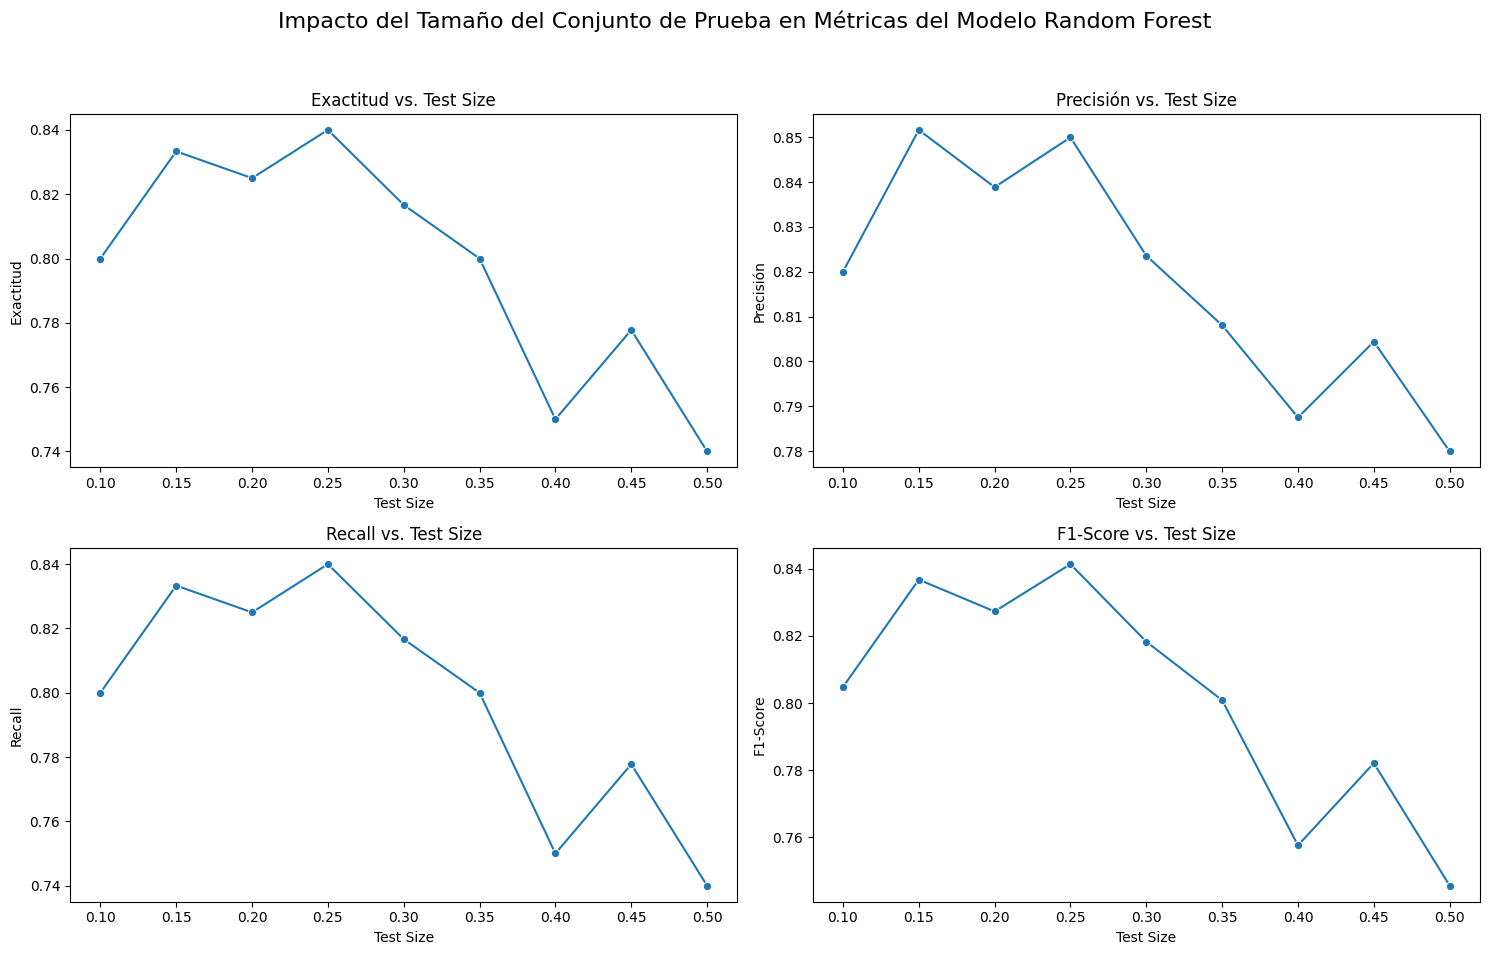

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Impacto del Tamaño del Conjunto de Prueba en Métricas del Modelo Random Forest', fontsize=16)

sns.lineplot(ax=axes[0, 0], x='test_size', y='accuracy', data=df_results, marker='o')
axes[0, 0].set_title('Exactitud vs. Test Size')
axes[0, 0].set_xlabel('Test Size')
axes[0, 0].set_ylabel('Exactitud')

sns.lineplot(ax=axes[0, 1], x='test_size', y='precision', data=df_results, marker='o')
axes[0, 1].set_title('Precisión vs. Test Size')
axes[0, 1].set_xlabel('Test Size')
axes[0, 1].set_ylabel('Precisión')

sns.lineplot(ax=axes[1, 0], x='test_size', y='recall', data=df_results, marker='o')
axes[1, 0].set_title('Recall vs. Test Size')
axes[1, 0].set_xlabel('Test Size')
axes[1, 0].set_ylabel('Recall')

sns.lineplot(ax=axes[1, 1], x='test_size', y='f1_score', data=df_results, marker='o')
axes[1, 1].set_title('F1-Score vs. Test Size')
axes[1, 1].set_xlabel('Test Size')
axes[1, 1].set_ylabel('F1-Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Análisis y Recomendación del Test Size

### Objetivo:
Interpretar los gráficos para identificar tendencias y sugerir un `test_size` apropiado basado en el rendimiento del modelo.

### Resultados
Basándose en el análisis de los gráficos generados, un test_size de 0.25 parece ser el más apropiado, ya que estos valores muestran consistentemente un rendimiento más alto y más estable en las métricas de exactitud, precisión, recall y F1-score en comparación con otros valores de test_size probados.


## División de Datos


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribution of target variable in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of target variable in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (148, 38)
Shape of X_test: (50, 38)
Shape of y_train: (148,)
Shape of y_test: (50,)

Distribution of target variable in y_train:
disc_PPP
High           0.202703
Low            0.202703
Medium         0.202703
Medium-Low     0.195946
Medium-High    0.195946
Name: proportion, dtype: float64

Distribution of target variable in y_test:
disc_PPP
High           0.2
Medium-Low     0.2
Medium-High    0.2
Low            0.2
Medium         0.2
Name: proportion, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


In [ ]:
y_pred = model.predict(X_test)

print("Predictions on the test set generated successfully.")
print("First 5 predictions:", y_pred[:5])

Predictions on the test set generated successfully.
First 5 predictions: ['High' 'Medium-Low' 'Medium-High' 'Medium-High' 'High']


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Accuracy: 0.8400
Precision (weighted): 0.8500
Recall (weighted): 0.8400
F1-Score (weighted): 0.8414


##ROC Multi-Clase Random Forest sin PCA


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()

label_binarizer.fit(y)

y_test_binarized = label_binarizer.transform(y_test)

y_pred_proba = model.predict_proba(X_test)

print("Shape of binarized y_test:", y_test_binarized.shape)
print("Shape of prediction probabilities:", y_pred_proba.shape)
print("First 5 rows of binarized y_test:\n", y_test_binarized[:5])
print("First 5 rows of prediction probabilities:\n", y_pred_proba[:5])

Shape of binarized y_test: (50, 5)
Shape of prediction probabilities: (50, 5)
First 5 rows of binarized y_test:
 [[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]]
First 5 rows of prediction probabilities:
 [[0.95 0.   0.   0.05 0.  ]
 [0.   0.   0.29 0.02 0.69]
 [0.17 0.   0.26 0.55 0.02]
 [0.15 0.   0.39 0.44 0.02]
 [0.99 0.   0.   0.01 0.  ]]


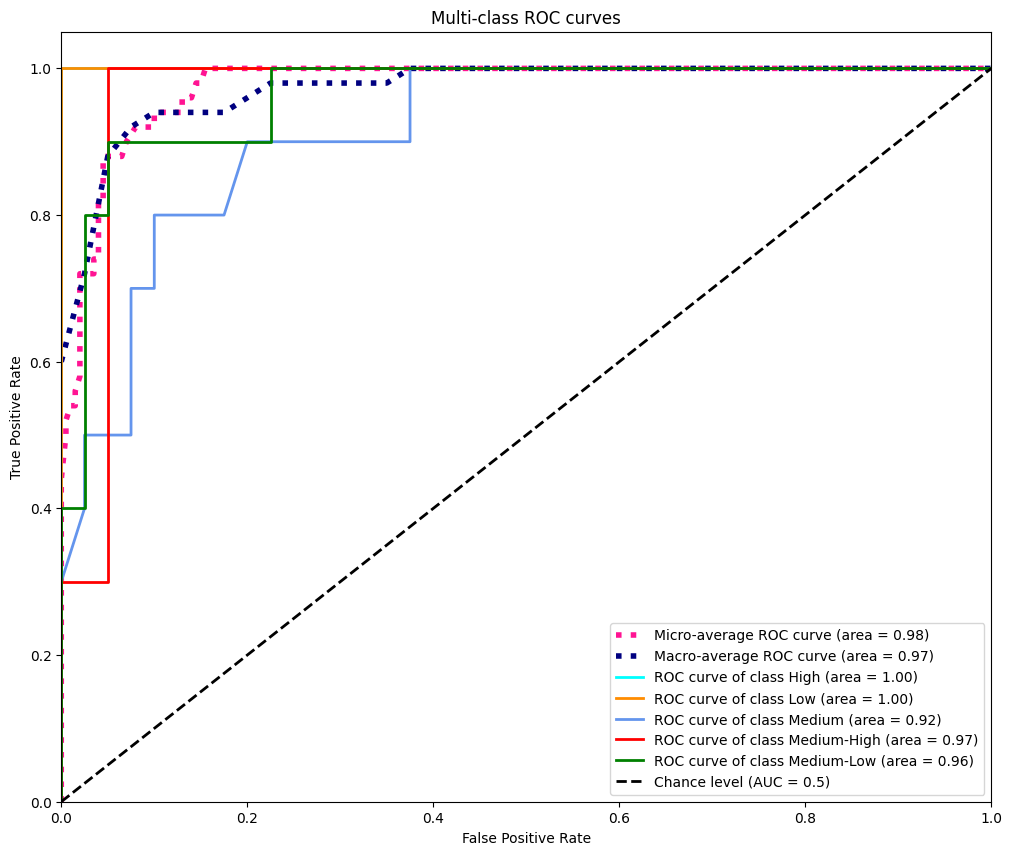

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(12, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

class_names = label_binarizer.classes_

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves')
plt.legend(loc="lower right")
plt.show()

Análisis de las Curvas ROC y AUC:

Curvas Individuales: El gráfico muestra la curva ROC para cada una de las 5 categorías de disc_PPP. La línea azul clara (aqua) representa la clase 'High' con un AUC de 1.00, y la línea naranja oscuro (darkorange) representa la clase 'Low' también con un AUC de 1.00. Esto sugiere que el modelo tiene una capacidad perfecta para distinguir estas dos clases de las demás en el conjunto de prueba. Las otras clases ('Medium', 'Medium-High', 'Medium-Low') también muestran un rendimiento muy bueno, con AUCs de 0.92, 0.97 y 0.96 respectivamente.

Micro-average ROC (rosa): Esta curva se calcula globalmente, considerando todos los pares de predicciones y etiquetas en todas las clases. El AUC micro-promedio es de 0.98, lo que indica un excelente rendimiento general del modelo en la clasificación multi-clase.

Macro-average ROC (azul oscuro): Esta curva promedia las métricas de ROC de cada clase de manera independiente. El AUC macro-promedio es de 0.97, lo que también confirma el alto rendimiento del modelo, especialmente porque toma en cuenta el rendimiento en cada clase sin importar su tamaño.

Nivel de Azar (gris discontinuo): La línea discontinua negra horizontal a AUC = 0.5 representa un clasificador que predice al azar. Todas las curvas de nuestro modelo están muy por encima de esta línea, lo que demuestra que el modelo es mucho mejor que el azar para todas las clases y en promedio.

# Etapa 3 Modelamiento Con PCA

In [ ]:
import pandas as pd

ruta = '/content/drive/MyDrive/proyecto_wb/df_etapa2.csv'
df_wb = pd.read_csv(ruta)

df_wb.head()

df_wb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC1        198 non-null    float64
 1   PC2        198 non-null    float64
 2   PC3        198 non-null    float64
 3   PC4        198 non-null    float64
 4   PC5        198 non-null    float64
 5   PC6        198 non-null    float64
 6   PC7        198 non-null    float64
 7   PC8        198 non-null    float64
 8   PC9        198 non-null    float64
 9   Iso        198 non-null    object 
 10  Class_PIB  198 non-null    object 
dtypes: float64(9), object(2)
memory usage: 17.1+ KB


## Modelamiento de datos

In [ ]:
df_wb['disc_PPP'] = df_wb['Class_PIB']

In [ ]:
df_wb['disc_PPP'].value_counts()

,count
disc_PPP,
Low,40
Medium,40
High,40
Medium-High,39
Medium-Low,39


Al estar la muestra balanceada, se puede priorizar la Exactitud para predecir la mayor cantidad de forma correcta. Considerando que los costos de error son similares y bajos.

## Preparación de Datos

Dividir el DataFrame en características (X) y la variable objetivo (y). Excluir las columnas 'Iso', 'Country' y 'Class_PIB' de las características.


In [ ]:
y = df_wb['disc_PPP']
X = df_wb.drop(columns=['Iso', 'disc_PPP', 'Class_PIB'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 values of y:")
print(y.head())

Shape of X: (198, 9)
Shape of y: (198,)
First 5 rows of X:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -4.602131  1.235386  1.332283 -0.598186  0.570870 -0.419350 -0.710713   
1  1.026883 -3.986859  1.589040  4.059323 -1.800760 -2.085133  0.049524   
2  2.861316 -2.759079  1.339063  1.942698  1.384872  0.532540 -0.331282   
3 -0.778497  1.648362  2.114748 -0.707849 -0.913314  0.220033  0.147372   
4 -5.698572  3.473858 -1.141708  0.597051  0.792000 -0.024222 -0.148404   

        PC8       PC9  
0  0.784929 -0.682416  
1  0.792384  0.315382  
2 -0.831056 -0.645347  
3  0.543505 -1.056067  
4  0.234853  0.410856  
First 5 values of y:
0            Low
1         Medium
2    Medium-High
3     Medium-Low
4            Low
Name: disc_PPP, dtype: object


# Modelo 1 con PCA Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

results = []

test_sizes = np.arange(0.1, 0.51, 0.05)

for test_size in test_sizes:
    print(f"\nEvaluating with test_size = {test_size:.2f}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    model = SVC(random_state=42, probability=True)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

print("\nResults for different test_sizes:")
for res in results:
    print(f"  Test Size: {res['test_size']:.2f}, Accuracy: {res['accuracy']:.4f}, Precision: {res['precision']:.4f}, Recall: {res['recall']:.4f}, F1-Score: {res['f1_score']:.4f}")


Evaluating with test_size = 0.10

Evaluating with test_size = 0.15

Evaluating with test_size = 0.20

Evaluating with test_size = 0.25

Evaluating with test_size = 0.30

Evaluating with test_size = 0.35

Evaluating with test_size = 0.40

Evaluating with test_size = 0.45

Evaluating with test_size = 0.50

Results for different test_sizes:
  Test Size: 0.10, Accuracy: 0.7500, Precision: 0.7433, Recall: 0.7500, F1-Score: 0.7259
  Test Size: 0.15, Accuracy: 0.7333, Precision: 0.7324, Recall: 0.7333, F1-Score: 0.7289
  Test Size: 0.20, Accuracy: 0.7000, Precision: 0.7143, Recall: 0.7000, F1-Score: 0.7044
  Test Size: 0.25, Accuracy: 0.6400, Precision: 0.6621, Recall: 0.6400, F1-Score: 0.6414
  Test Size: 0.30, Accuracy: 0.6167, Precision: 0.6387, Recall: 0.6167, F1-Score: 0.6230
  Test Size: 0.35, Accuracy: 0.6714, Precision: 0.7102, Recall: 0.6714, F1-Score: 0.6743
  Test Size: 0.40, Accuracy: 0.5875, Precision: 0.6363, Recall: 0.5875, F1-Score: 0.5920
  Test Size: 0.45, Accuracy: 0.6333,

In [ ]:
import pandas as pd

df_results = pd.DataFrame(results)

print("DataFrame created from results:")
print(df_results.head())

DataFrame created from results:
   test_size  accuracy  precision    recall  f1_score
0       0.10  0.750000   0.743333  0.750000  0.725873
1       0.15  0.733333   0.732381  0.733333  0.728904
2       0.20  0.700000   0.714286  0.700000  0.704444
3       0.25  0.640000   0.662103  0.640000  0.641438
4       0.30  0.616667   0.638717  0.616667  0.623034


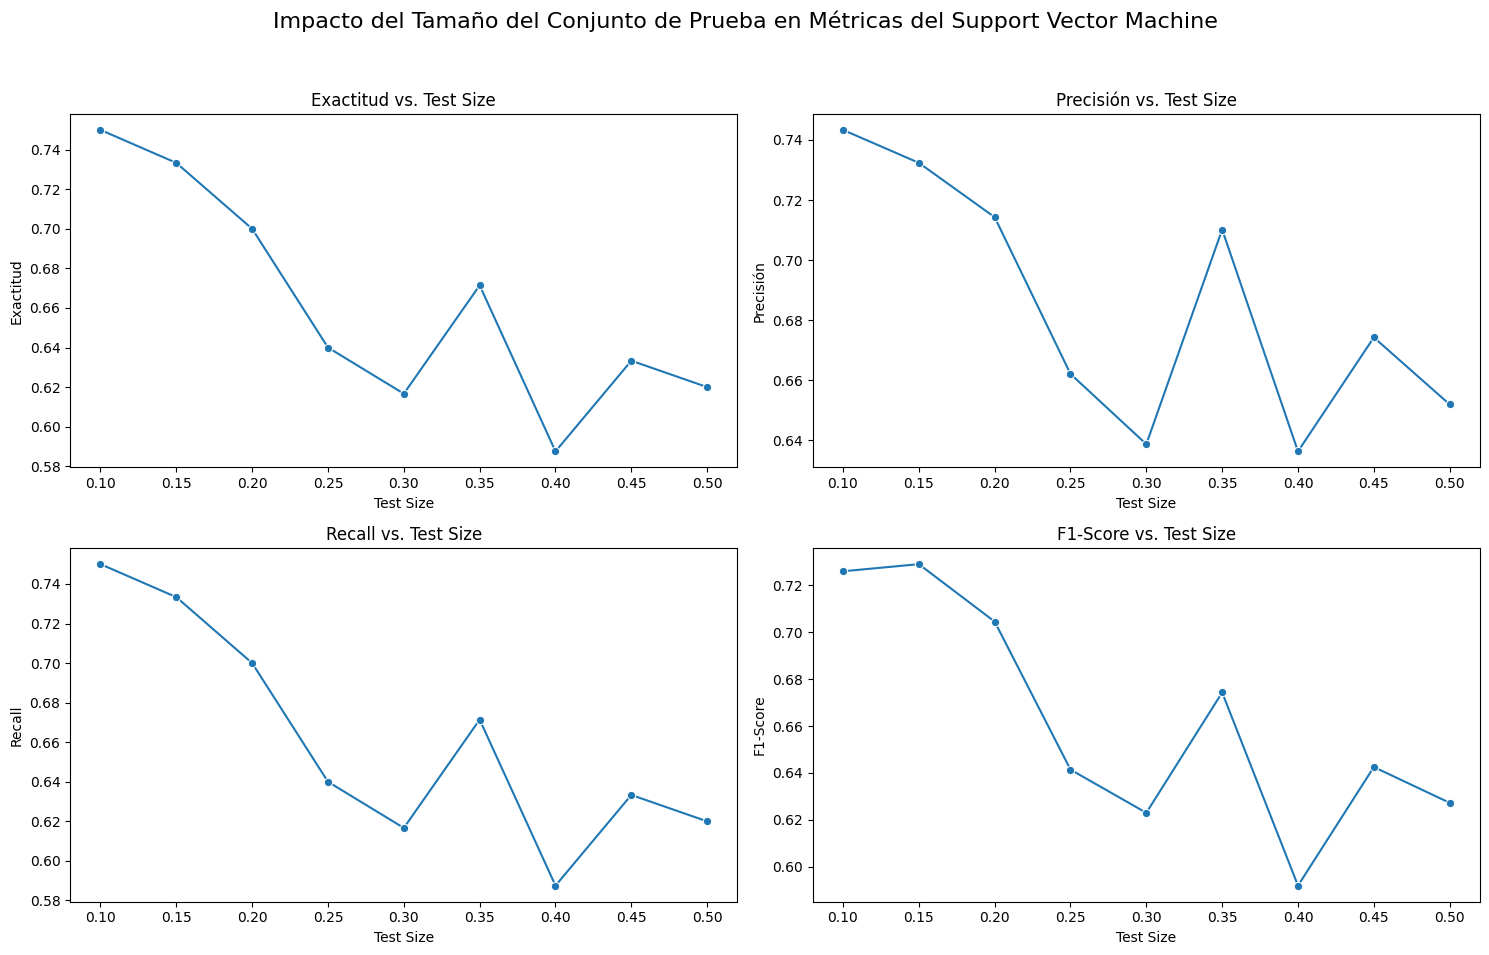

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Impacto del Tamaño del Conjunto de Prueba en Métricas del Support Vector Machine', fontsize=16)

sns.lineplot(ax=axes[0, 0], x='test_size', y='accuracy', data=df_results, marker='o')
axes[0, 0].set_title('Exactitud vs. Test Size')
axes[0, 0].set_xlabel('Test Size')
axes[0, 0].set_ylabel('Exactitud')

sns.lineplot(ax=axes[0, 1], x='test_size', y='precision', data=df_results, marker='o')
axes[0, 1].set_title('Precisión vs. Test Size')
axes[0, 1].set_xlabel('Test Size')
axes[0, 1].set_ylabel('Precisión')

sns.lineplot(ax=axes[1, 0], x='test_size', y='recall', data=df_results, marker='o')
axes[1, 0].set_title('Recall vs. Test Size')
axes[1, 0].set_xlabel('Test Size')
axes[1, 0].set_ylabel('Recall')

sns.lineplot(ax=axes[1, 1], x='test_size', y='f1_score', data=df_results, marker='o')
axes[1, 1].set_title('F1-Score vs. Test Size')
axes[1, 1].set_xlabel('Test Size')
axes[1, 1].set_ylabel('F1-Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Análisis y Recomendación del Test Size

### Objetivo:
Interpretar los gráficos para identificar tendencias y sugerir un `test_size` apropiado basado en el rendimiento del modelo.

### Resultados
Basándose en el análisis de los gráficos generados, un test_size de 0.10 parece ser el más apropiado, ya que estos valores muestran consistentemente un rendimiento más alto y más estable en las métricas de exactitud, precisión, recall y F1-score en comparación con otros valores de test_size probados.


## División de Datos

Dividir los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribution of target variable in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of target variable in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (178, 9)
Shape of X_test: (20, 9)
Shape of y_train: (178,)
Shape of y_test: (20,)

Distribution of target variable in y_train:
disc_PPP
High           0.202247
Low            0.202247
Medium         0.202247
Medium-Low     0.196629
Medium-High    0.196629
Name: proportion, dtype: float64

Distribution of target variable in y_test:
disc_PPP
Low            0.2
Medium-Low     0.2
Medium         0.2
High           0.2
Medium-High    0.2
Name: proportion, dtype: float64


In [ ]:
from sklearn.svm import SVC

model = SVC(random_state=42, probability=True)

model.fit(X_train, y_train)

print("Support Vector Classifier trained successfully.")

Support Vector Classifier trained successfully.


In [ ]:
y_pred = model.predict(X_test)

print("Predictions on the test set generated successfully.")
print("First 5 predictions:", y_pred[:5])

Predictions on the test set generated successfully.
First 5 predictions: ['Low' 'Medium-Low' 'Medium' 'Medium-Low' 'Medium-Low']


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Accuracy: 0.7500
Precision (weighted): 0.7433
Recall (weighted): 0.7500
F1-Score (weighted): 0.7259


##ROC Multi-Clase Random Forest PCA

Binarizar la variable objetivo `y_test` y obtener las probabilidades de predicción del modelo para el conjunto de prueba (`X_test`).


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()

label_binarizer.fit(y)

y_test_binarized = label_binarizer.transform(y_test)

y_pred_proba = model.predict_proba(X_test)

print("Shape of binarized y_test:", y_test_binarized.shape)
print("Shape of prediction probabilities:", y_pred_proba.shape)
print("First 5 rows of binarized y_test:\n", y_test_binarized[:5])
print("First 5 rows of prediction probabilities:\n", y_pred_proba[:5])

Shape of binarized y_test: (20, 5)
Shape of prediction probabilities: (20, 5)
First 5 rows of binarized y_test:
 [[0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]]
First 5 rows of prediction probabilities:
 [[0.00439263 0.79385133 0.01861926 0.01402769 0.16910908]
 [0.0109157  0.02305566 0.18440457 0.02215094 0.75947313]
 [0.02690456 0.11535854 0.63372202 0.10299508 0.12101981]
 [0.00522214 0.03545431 0.39710943 0.08413168 0.47808244]
 [0.01114719 0.11943298 0.22931451 0.0296932  0.61041212]]


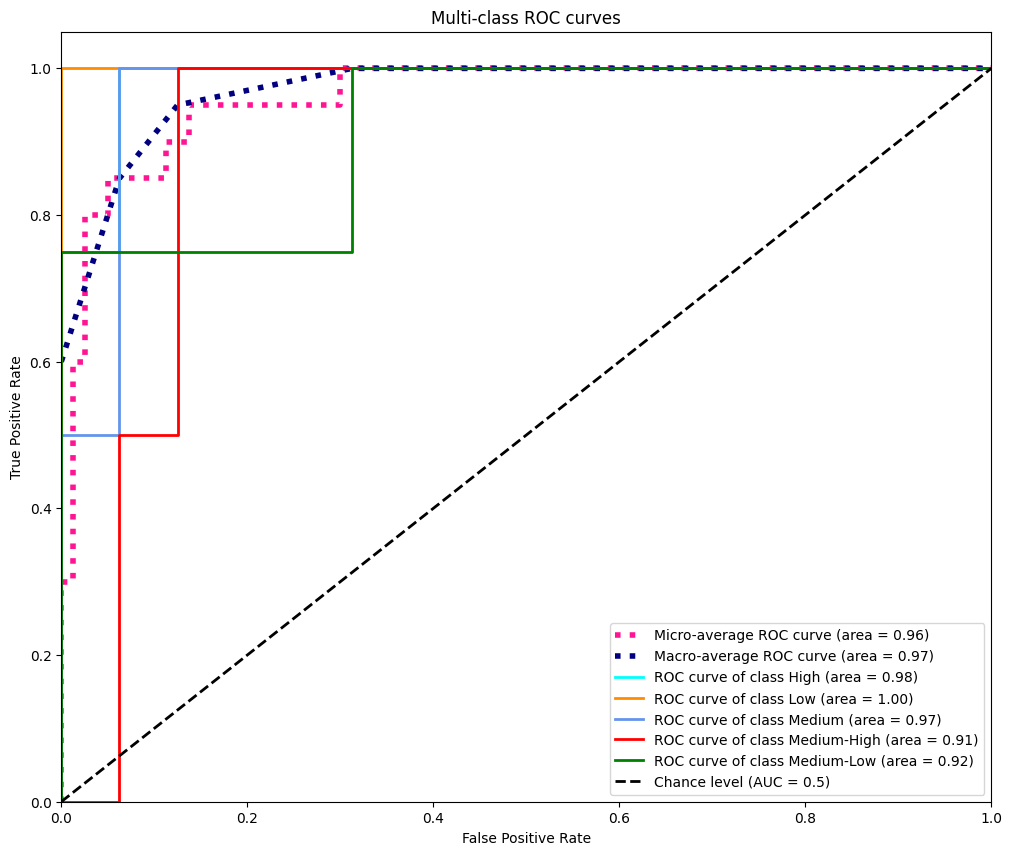

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(12, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

class_names = label_binarizer.classes_

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves')
plt.legend(loc="lower right")
plt.show()

# Modelo 2 con PCA Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

results = []

test_sizes = np.arange(0.1, 0.51, 0.05)

for test_size in test_sizes:
    print(f"\nEvaluating with test_size = {test_size:.2f}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    model = RandomForestClassifier(random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

print("\nResults for different test_sizes:")
for res in results:
    print(f"  Test Size: {res['test_size']:.2f}, Accuracy: {res['accuracy']:.4f}, Precision: {res['precision']:.4f}, Recall: {res['recall']:.4f}, F1-Score: {res['f1_score']:.4f}")


Evaluating with test_size = 0.10

Evaluating with test_size = 0.15

Evaluating with test_size = 0.20

Evaluating with test_size = 0.25

Evaluating with test_size = 0.30

Evaluating with test_size = 0.35

Evaluating with test_size = 0.40

Evaluating with test_size = 0.45

Evaluating with test_size = 0.50

Results for different test_sizes:
  Test Size: 0.10, Accuracy: 0.5500, Precision: 0.5700, Recall: 0.5500, F1-Score: 0.5443
  Test Size: 0.15, Accuracy: 0.6000, Precision: 0.5692, Recall: 0.6000, F1-Score: 0.5715
  Test Size: 0.20, Accuracy: 0.6000, Precision: 0.6063, Recall: 0.6000, F1-Score: 0.5954
  Test Size: 0.25, Accuracy: 0.6600, Precision: 0.6665, Recall: 0.6600, F1-Score: 0.6626
  Test Size: 0.30, Accuracy: 0.5667, Precision: 0.5739, Recall: 0.5667, F1-Score: 0.5699
  Test Size: 0.35, Accuracy: 0.5571, Precision: 0.5678, Recall: 0.5571, F1-Score: 0.5576
  Test Size: 0.40, Accuracy: 0.5875, Precision: 0.6235, Recall: 0.5875, F1-Score: 0.6002
  Test Size: 0.45, Accuracy: 0.5556,

In [ ]:
import pandas as pd

df_results = pd.DataFrame(results)

print("DataFrame created from results:")
print(df_results.head())

DataFrame created from results:
   test_size  accuracy  precision    recall  f1_score
0       0.10  0.550000   0.570000  0.550000  0.544286
1       0.15  0.600000   0.569206  0.600000  0.571484
2       0.20  0.600000   0.606313  0.600000  0.595433
3       0.25  0.660000   0.666465  0.660000  0.662607
4       0.30  0.566667   0.573893  0.566667  0.569855


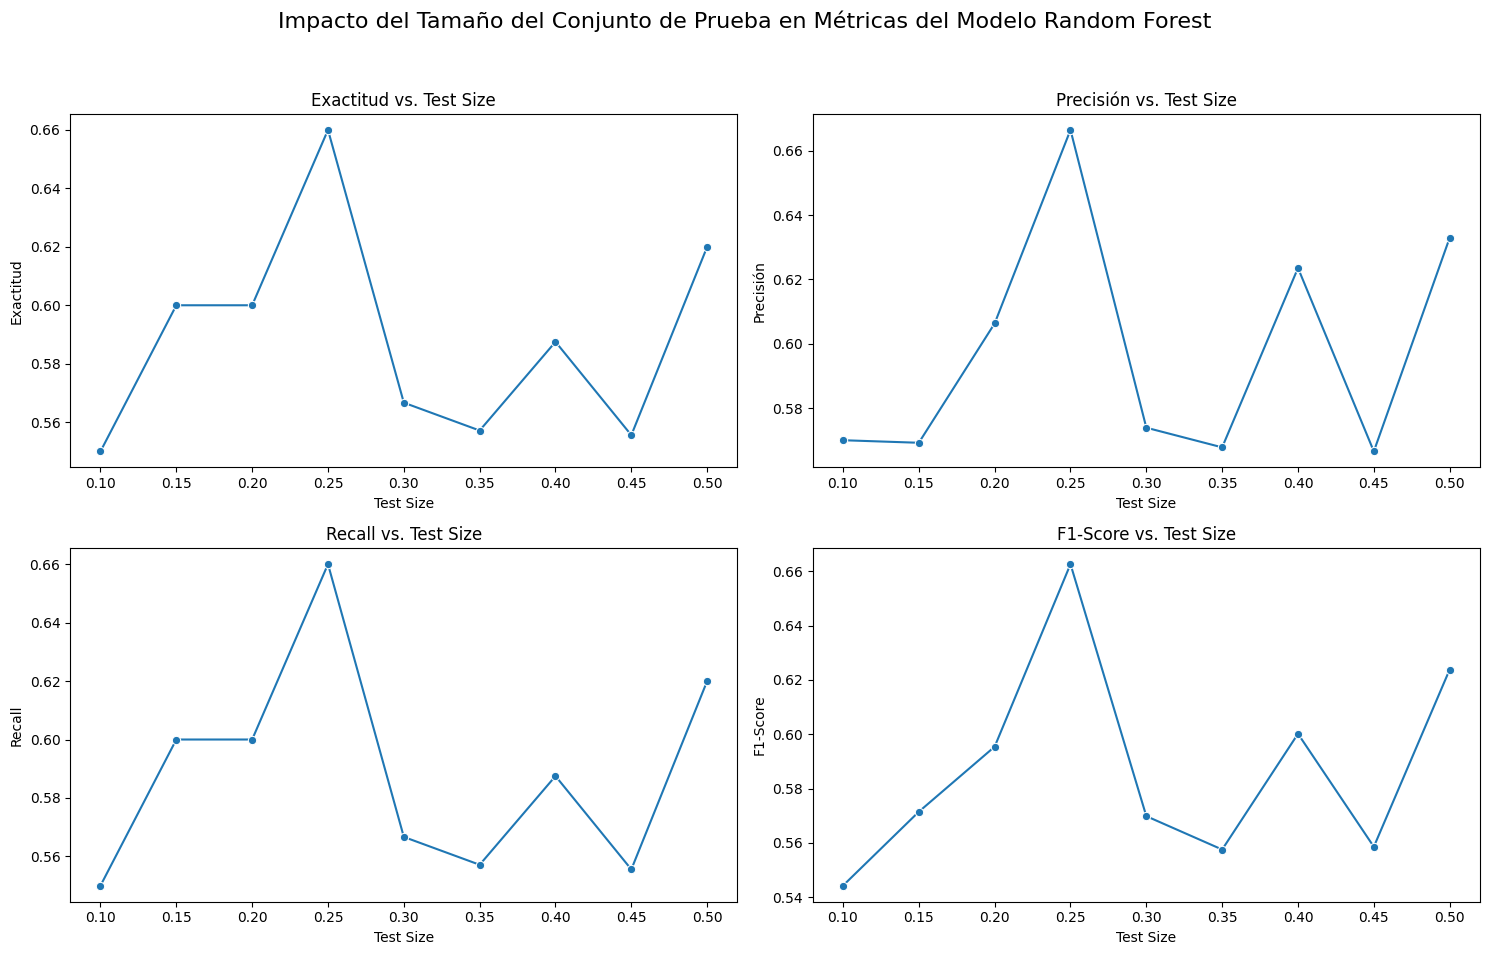

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Impacto del Tamaño del Conjunto de Prueba en Métricas del Modelo Random Forest', fontsize=16)

sns.lineplot(ax=axes[0, 0], x='test_size', y='accuracy', data=df_results, marker='o')
axes[0, 0].set_title('Exactitud vs. Test Size')
axes[0, 0].set_xlabel('Test Size')
axes[0, 0].set_ylabel('Exactitud')

sns.lineplot(ax=axes[0, 1], x='test_size', y='precision', data=df_results, marker='o')
axes[0, 1].set_title('Precisión vs. Test Size')
axes[0, 1].set_xlabel('Test Size')
axes[0, 1].set_ylabel('Precisión')

sns.lineplot(ax=axes[1, 0], x='test_size', y='recall', data=df_results, marker='o')
axes[1, 0].set_title('Recall vs. Test Size')
axes[1, 0].set_xlabel('Test Size')
axes[1, 0].set_ylabel('Recall')

sns.lineplot(ax=axes[1, 1], x='test_size', y='f1_score', data=df_results, marker='o')
axes[1, 1].set_title('F1-Score vs. Test Size')
axes[1, 1].set_xlabel('Test Size')
axes[1, 1].set_ylabel('F1-Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Análisis y Recomendación del Test Size

### Objetivo:
Interpretar los gráficos para identificar tendencias y sugerir un `test_size` apropiado basado en el rendimiento del modelo.

### Resultados
Basándose en el análisis de los gráficos generados, un test_size de 0.25 parece ser el más apropiado, ya que estos valores muestran consistentemente un rendimiento más alto y más estable en las métricas de exactitud, precisión, recall y F1-score en comparación con otros valores de test_size probados.


## División de Datos


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nDistribution of target variable in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of target variable in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (148, 9)
Shape of X_test: (50, 9)
Shape of y_train: (148,)
Shape of y_test: (50,)

Distribution of target variable in y_train:
disc_PPP
High           0.202703
Low            0.202703
Medium         0.202703
Medium-Low     0.195946
Medium-High    0.195946
Name: proportion, dtype: float64

Distribution of target variable in y_test:
disc_PPP
High           0.2
Medium-Low     0.2
Medium-High    0.2
Low            0.2
Medium         0.2
Name: proportion, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


In [ ]:
y_pred = model.predict(X_test)

print("Predictions on the test set generated successfully.")
print("First 5 predictions:", y_pred[:5])

Predictions on the test set generated successfully.
First 5 predictions: ['High' 'Medium' 'Medium-High' 'High' 'High']


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

Accuracy: 0.6600
Precision (weighted): 0.6665
Recall (weighted): 0.6600
F1-Score (weighted): 0.6626


##ROC Multi-Clase Support Vector Classificator PCA


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()

label_binarizer.fit(y)

y_test_binarized = label_binarizer.transform(y_test)

y_pred_proba = model.predict_proba(X_test)

print("Shape of binarized y_test:", y_test_binarized.shape)
print("Shape of prediction probabilities:", y_pred_proba.shape)
print("First 5 rows of binarized y_test:\n", y_test_binarized[:5])
print("First 5 rows of prediction probabilities:\n", y_pred_proba[:5])

Shape of binarized y_test: (50, 5)
Shape of prediction probabilities: (50, 5)
First 5 rows of binarized y_test:
 [[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]]
First 5 rows of prediction probabilities:
 [[0.7  0.   0.05 0.19 0.06]
 [0.07 0.02 0.4  0.16 0.35]
 [0.15 0.03 0.19 0.38 0.25]
 [0.42 0.03 0.05 0.41 0.09]
 [0.68 0.   0.14 0.17 0.01]]


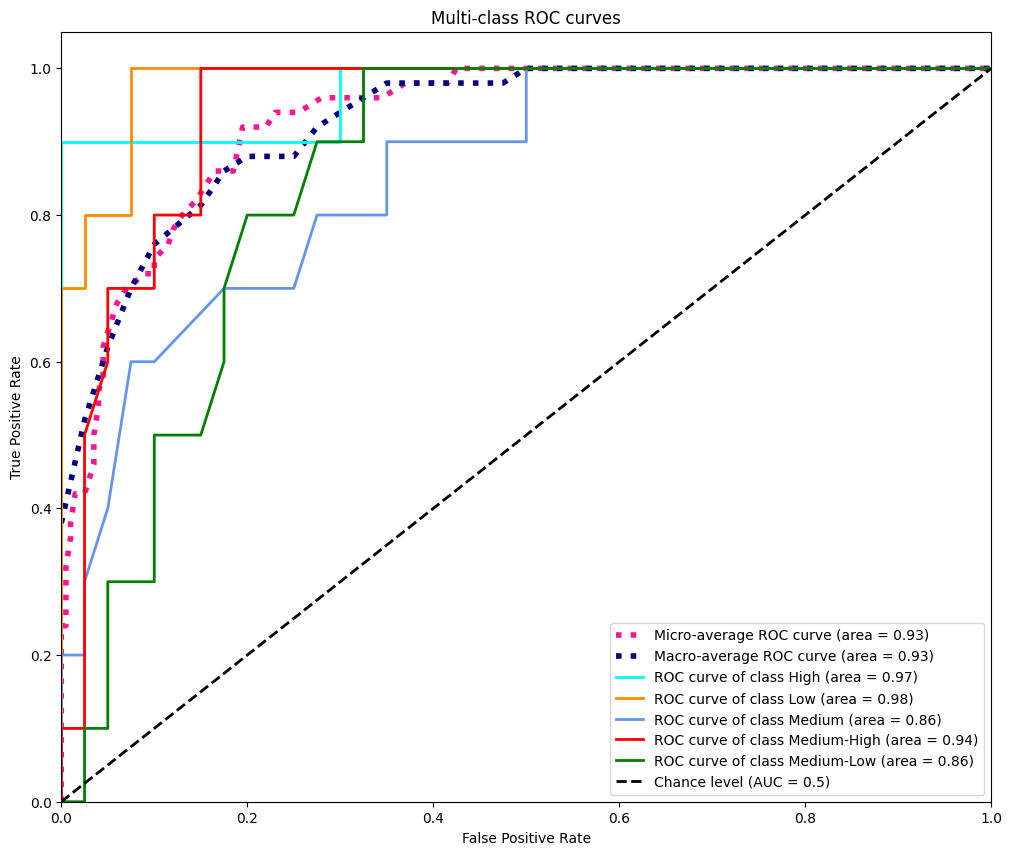

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(12, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

class_names = label_binarizer.classes_

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves')
plt.legend(loc="lower right")
plt.show()

# Conclusión

Se ejecutaron dos modelos de clasificación que predicen una varaible ordenada para el nivel de PIB de los países extraídos de la base de datos del Banco Muncial. Estas categorías económicas no han sido estandarizadas previamente, lo que genera un sobreajuste general de los modelos:

Ambos modelos demostraron comportarse mejor según el criterio ROC cuando fueron utilizados sin PCA. Debido a que PCA introduce ruido al sintetizar las variables, lo cual naturalmente hace menos precisas las predicciones a cambio de facilidad computacional.

Sin PCA, el modelo SVC se comportó mejor, arrojando un ROC Medio cercano a 0.98.
Mientras que para los modelos con PCA, Random Forest pudo clasificar con mayor precisión, cercano a 0.93.

Los modelos identificaron con alta precisión las economías de ingresos Bajos y Altos, lo que confirma que las características estructurales de estos grupos son inconfundibles en la escala real.

La mayor tasa de error se concentró en las categorías intermedias ("Medium-High"), lo que podría reflejar que la transición entre una economía emergente y una en desarrollo es un espectro continuo y no una frontera rígida como es la clasificación.

Síntesis
Los resultados confirman que el procesamiento mediante PCA, aplicado a un entorno de datos que respeta la magnitud real de las economías, genera un espacio de características donde la clasificación es viable y efectiva, perdiendo precisión a cambio de sintetizar los modelos.